In [147]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from datetime import datetime
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.decomposition import PCA
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
import xgboost as xgb
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.dummy import DummyRegressor
import pandas as pd
import numpy as np
import datetime
from tqdm import tqdm
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, VotingClassifier, RandomForestRegressor
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings("ignore")
seed=0

In [3]:
data = pd.read_csv('data/doc_embedding/doc2vec_5.csv.gz', compression='gzip', low_memory=False, lineterminator='\n', index_col=None)
data['text_length'] = data['text'].str.len()
data

,id,text,create_at,geo,retweet_count,like_count,hashtags,username,following,followers,user_total_tweets,user_likes_count,cleaned_text,0,1,2,3,4,text_length
0,1.591219e+18,'Like a 1930s Dictator': Vitalik Buterin Lays ...,2022-11-11 23:59:59+00:00,"For now, Earth",0.0,1.0,#ftx,johnmorganFL,630.0,28492.0,240872.0,111.0,like dictator vitalik buterin lay sam bankmanf...,-0.050280,-0.082372,-0.403813,0.343514,-0.114275,102
1,1.591219e+18,"💸 $1,000 #Giveaway 💸\n\nWe'll select 10 winner...",2022-11-11 23:59:57+00:00,Panama,8866.0,0.0,#ftx,KuKzNFT,594.0,1014.0,4452.0,8272.0,giveaway select winner randomly award account...,0.036596,-0.206302,-0.310768,0.017608,-0.180571,294
2,1.591219e+18,#FTX crazy Shit! #Crypto https://t.co/2GO4X3u2pt,2022-11-11 23:59:55+00:00,"Seattle, WA",0.0,0.0,#ftx,MeAndMySports,315.0,342.0,3032.0,1572.0,ftx crazy shit crypto,0.067313,0.077195,-0.253732,0.035752,-0.148803,48
3,1.591219e+18,"Yo @SBF_FTX, draw me like one of your French g...",2022-11-11 23:59:53+00:00,"London, England",0.0,0.0,#ftx,thedoc7er,1513.0,296.0,4541.0,3626.0,draw like french girl ftxcrash ftx binance czb...,-0.077048,-0.079641,-0.194717,0.034530,-0.233831,145
4,1.591219e+18,@BitcoinMagazine you you simpletons cant under...,2022-11-11 23:59:51+00:00,NaN,0.0,1.0,#ftx,jesseypaul4,123.0,44.0,317.0,81.0,simpleton understand crypto wallet like exodus...,-0.044414,0.188190,-0.373165,0.190177,-0.057381,296
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157503,1.591565e+18,"🔴 WAR IN 🇺🇦: FRANCE 24 reporter @cntrentF24, w...",2022-11-12 22:52:11+00:00,Hauts de France 🇫🇷 🇪🇺,20.0,0.0,#ukraine,annetteashley61,10522.0,9603.0,437088.0,291392.0,war france reporter spend lot time report ukra...,0.000284,-0.033411,-0.133149,-0.105751,-0.251749,247
157504,1.591565e+18,People still celebrating in Kherson and I love...,2022-11-12 22:52:09+00:00,"Belgrade, Serbia, Europe",1041.0,0.0,#ukraine,svrhovac,222.0,150.0,9174.0,16675.0,people celebrate kherson love bit ukraine kherson,0.010565,0.060826,-0.350584,0.049818,-0.177926,106
157505,1.591565e+18,A remarkable story #Ukraine https://t.co/eeBLc...,2022-11-12 22:52:04+00:00,Guernsey,0.0,0.0,#ukraine,TimBarker10,2668.0,1217.0,3290.0,5927.0,remarkable story ukraine,0.190824,-0.116201,-0.143220,0.001937,-0.205393,51
157506,1.591565e+18,#Ukraine: Relief in liberated #Kherson after 8...,2022-11-12 22:52:02+00:00,🇮🇪🇪🇺🇺🇦🎮,189.0,0.0,#ukraine,Aontaithe2021,5001.0,2376.0,392315.0,308109.0,ukraine relief liberated kherson month putin ...,0.125411,-0.141191,0.010266,0.155167,-0.070691,220


In [4]:
data.columns

Index(['id', 'text', 'create_at', 'geo', 'retweet_count', 'like_count',
       'hashtags', 'username', 'following', 'followers', 'user_total_tweets',
       'user_likes_count', 'cleaned_text', '0', '1', '2', '3', '4',
       'text_length'],
      dtype='object')

In [5]:
data['hashtags'].value_counts()

#ukraine          27000
#covid            27000
#christmas        26692
#vegan            26651
#climatechange    26089
#ftx              24076
Name: hashtags, dtype: int64

In [6]:
count_dist = pd.DataFrame(data['like_count'].value_counts()).reset_index()
count_dist.columns = ['number of likes', 'like_count']
count_dist.sort_values(by=['number of likes'])
count_dist.head(10)


,number of likes,like_count
0,0.0,134200
1,1.0,9195
2,2.0,3983
3,3.0,2257
4,4.0,1468
5,5.0,959
6,6.0,730
7,7.0,516
8,8.0,467
9,9.0,331


In [7]:
print(data[data['like_count'] == 0].shape[0])
print(data[data['like_count'] == 1].shape[0])
print(data[data['like_count'] == 2].shape[0])
print(data[(data['like_count'] >= 3) & (data['like_count'] <= 4)].shape[0])
print(data[(data['like_count'] >= 5) & (data['like_count'] <= 10)].shape[0])
print(data[data['like_count'] >= 11].shape[0])

134200
9195
3983
3725
3269
3136


In [20]:
print(data[data['like_count'] == 0].shape[0])
print(data[data['like_count'] > 0].shape[0])

134200
23308


In [8]:
print(data[data['retweet_count'] == 0].shape[0])
print(data[(data['retweet_count'] >= 1) & (data['retweet_count'] <= 5)].shape[0])
print(data[(data['retweet_count'] >= 6) & (data['retweet_count'] <= 40)].shape[0])
print(data[(data['retweet_count'] >= 41) & (data['retweet_count'] <= 300)].shape[0])
print(data[data['retweet_count'] >= 301].shape[0])

32989
31679
29200
30819
32821


In [175]:
data[data['retweet_count'] == 0].shape[0] / data.shape[0]

0.20944332986261016

In [176]:
data[data['like_count'] == 0].shape[0] / data.shape[0]

0.85202021484623

Bin the likes count into 6 classes and retweet count into 2 classes.

In [90]:
def like_classify(x):
    if x <= 2:
        return int(x)
    elif 3 <= x <= 4:
        return 3
    elif 5 <= x <= 10:
        return 4
    else:
        return 5

def retweet_classify(x):
    # if x == 0:
    #     return 0
    # elif 1 <= x <= 5:
    #     return 1
    # elif 6 <= x <= 40:
    #     return 2
    # elif 41 <= x <= 300:
    #     return 3
    # else:
    #     return 4
    if x == 0:
        return 0
    else:
        return 1

data['like_count_class'] = data['like_count'].apply(like_classify)
data['retweet_count_class'] = data['retweet_count'].apply(retweet_classify)
data

,id,text,create_at,geo,retweet_count,like_count,hashtags,username,following,followers,...,user_likes_count,cleaned_text,0,1,2,3,4,text_length,like_count_class,retweet_count_class
0,1.591219e+18,'Like a 1930s Dictator': Vitalik Buterin Lays ...,2022-11-11 23:59:59+00:00,"For now, Earth",0.0,1.0,#ftx,johnmorganFL,630.0,28492.0,...,111.0,like dictator vitalik buterin lay sam bankmanf...,-0.050280,-0.082372,-0.403813,0.343514,-0.114275,102,1,0
1,1.591219e+18,"💸 $1,000 #Giveaway 💸\n\nWe'll select 10 winner...",2022-11-11 23:59:57+00:00,Panama,8866.0,0.0,#ftx,KuKzNFT,594.0,1014.0,...,8272.0,giveaway select winner randomly award account...,0.036596,-0.206302,-0.310768,0.017608,-0.180571,294,0,1
2,1.591219e+18,#FTX crazy Shit! #Crypto https://t.co/2GO4X3u2pt,2022-11-11 23:59:55+00:00,"Seattle, WA",0.0,0.0,#ftx,MeAndMySports,315.0,342.0,...,1572.0,ftx crazy shit crypto,0.067313,0.077195,-0.253732,0.035752,-0.148803,48,0,0
3,1.591219e+18,"Yo @SBF_FTX, draw me like one of your French g...",2022-11-11 23:59:53+00:00,"London, England",0.0,0.0,#ftx,thedoc7er,1513.0,296.0,...,3626.0,draw like french girl ftxcrash ftx binance czb...,-0.077048,-0.079641,-0.194717,0.034530,-0.233831,145,0,0
4,1.591219e+18,@BitcoinMagazine you you simpletons cant under...,2022-11-11 23:59:51+00:00,NaN,0.0,1.0,#ftx,jesseypaul4,123.0,44.0,...,81.0,simpleton understand crypto wallet like exodus...,-0.044414,0.188190,-0.373165,0.190177,-0.057381,296,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157503,1.591565e+18,"🔴 WAR IN 🇺🇦: FRANCE 24 reporter @cntrentF24, w...",2022-11-12 22:52:11+00:00,Hauts de France 🇫🇷 🇪🇺,20.0,0.0,#ukraine,annetteashley61,10522.0,9603.0,...,291392.0,war france reporter spend lot time report ukra...,0.000284,-0.033411,-0.133149,-0.105751,-0.251749,247,0,1
157504,1.591565e+18,People still celebrating in Kherson and I love...,2022-11-12 22:52:09+00:00,"Belgrade, Serbia, Europe",1041.0,0.0,#ukraine,svrhovac,222.0,150.0,...,16675.0,people celebrate kherson love bit ukraine kherson,0.010565,0.060826,-0.350584,0.049818,-0.177926,106,0,1
157505,1.591565e+18,A remarkable story #Ukraine https://t.co/eeBLc...,2022-11-12 22:52:04+00:00,Guernsey,0.0,0.0,#ukraine,TimBarker10,2668.0,1217.0,...,5927.0,remarkable story ukraine,0.190824,-0.116201,-0.143220,0.001937,-0.205393,51,0,0
157506,1.591565e+18,#Ukraine: Relief in liberated #Kherson after 8...,2022-11-12 22:52:02+00:00,🇮🇪🇪🇺🇺🇦🎮,189.0,0.0,#ukraine,Aontaithe2021,5001.0,2376.0,...,308109.0,ukraine relief liberated kherson month putin ...,0.125411,-0.141191,0.010266,0.155167,-0.070691,220,0,1


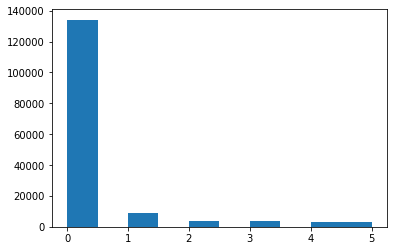

In [23]:
plt.hist(data['like_count_class'])
plt.show()

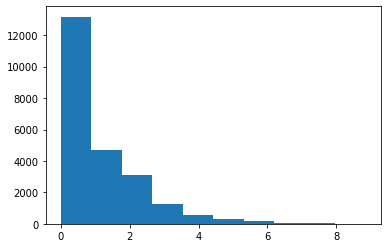

In [177]:
plt.hist(np.log([x for x in data['like_count'] if x > 0]))
plt.show()

In [59]:
data['retweet_count'].value_counts()

0.0        32989
1.0        12794
2.0         7064
3.0         4962
4.0         3829
           ...  
8892.0         1
14825.0        1
1576.0         1
545.0          1
1880.0         1
Name: retweet_count, Length: 1357, dtype: int64

In [12]:
all_features = [
    'following',
    'followers', 
    'user_total_tweets',
    'user_likes_count', 
    '0', '1', '2', '3', '4',
    'text_length'
]

In [13]:
X = data[all_features]
X.head(1)

,following,followers,user_total_tweets,user_likes_count,0,1,2,3,4,text_length
0,630.0,28492.0,240872.0,111.0,-0.05028,-0.082372,-0.403813,0.343514,-0.114275,102


In [14]:
y = data['retweet_count_class']

# Models

### Classification

In [91]:
names = [
    'Logistic regression',
    # 'SVM',
    # 'MLP classifier',
    'Decision tree',
    'Random forest',
    'Adaboost',
    'KNN'
]

classifiers = [
    LogisticRegression(max_iter=10000),
    # SVC(probability=True),
    # MLPClassifier(hidden_layer_sizes=(100, 50), random_state=seed, max_iter=10000),
    DecisionTreeClassifier(random_state=seed),
    RandomForestClassifier(random_state=seed),
    AdaBoostClassifier(random_state=seed),
    KNeighborsClassifier()
]

params = [
              {'clf__C': np.logspace(-2, 2, 10),
               'pca__n_components': [10]},
#               {'clf__C': [0.1, 1, 10], 
#                'clf__gamma': [1, 0.1, 0.01]},
            #   {'clf__alpha': [1e-3, 0.01, 0.1],
            #    'pca__n_components': [10]},
              {'clf__max_depth': [5, 10, 50, None],
               'pca__n_components': [10]},
              {'clf__n_estimators': [10], 
               'clf__max_depth': [10, 50, None],
               'pca__n_components': [10]},
              {'clf__n_estimators': [10],
               'pca__n_components': [10]},
              {'clf__n_neighbors': [4, 5, 6],
               # 'clf__weights': ['uniform', 'distance'],
               # 'clf__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
               'pca__n_components': [10]}
         ]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=seed)

for name, classifier, params in zip(names, classifiers, params):
    pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('pca', PCA(random_state=0)),
        ('clf', classifier),
    ])
    grid_search = GridSearchCV(pipe, param_grid=params, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    score = grid_search.score(X_test, y_test)
    print("{} accuracy: {}".format(name, score))
    print("best params:", grid_search.best_params_)

Logistic regression accuracy: 0.7894202199253372
best params: {'clf__C': 0.027825594022071243, 'pca__n_components': 10}
Decision tree accuracy: 0.7923914975747264
best params: {'clf__max_depth': 5, 'pca__n_components': 10}
Random forest accuracy: 0.7987149859054778
best params: {'clf__max_depth': 10, 'clf__n_estimators': 10, 'pca__n_components': 10}
Adaboost accuracy: 0.7892170556416181
best params: {'clf__n_estimators': 10, 'pca__n_components': 10}
KNN accuracy: 0.7633136094674556
best params: {'clf__n_neighbors': 5, 'pca__n_components': 10}


### Regression

In [111]:
names = [
    'Linear regression',
    # 'SVM',
    # 'MLP classifier',
    'Decision tree',
    'Random forest',
    'Gradient boost',
    'KNN'
]

regressors = [
    LinearRegression(),
    # SVC(probability=True),
    # MLPClassifier(hidden_layer_sizes=(100, 50), random_state=seed, max_iter=10000),
    DecisionTreeRegressor(random_state=seed),
    RandomForestRegressor(random_state=seed),
    GradientBoostingRegressor(random_state=seed),
    KNeighborsRegressor()
]

params = [
              {'pca__n_components': [10]},
#               {'clf__C': [0.1, 1, 10], 
#                'clf__gamma': [1, 0.1, 0.01]},
            #   {'clf__alpha': [1e-3, 0.01, 0.1],
            #    'pca__n_components': [10]},
              {'clf__max_depth': [5, 10, 50, None],
               'pca__n_components': [10]},
              {'clf__n_estimators': [10], 
               'clf__max_depth': [10, 50, None],
               'pca__n_components': [10]},
              {'clf__n_estimators': [10]},
              {'clf__n_neighbors': [4, 5, 6],
               # 'clf__weights': ['uniform', 'distance'],
               # 'clf__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
               'pca__n_components': [10]}
         ]

(array([24820., 16836., 17189., 17978., 18299., 17766.,  8918.,  2230.,
          321.,   162.]),
 array([0.        , 0.51698272, 1.03396544, 1.55094816, 2.06793088,
        2.5849136 , 3.10189632, 3.61887904, 4.13586176, 4.65284448,
        5.1698272 ]),
 <BarContainer object of 10 artists>)

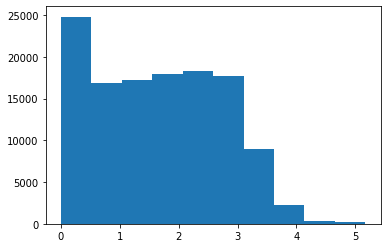

In [127]:
data1 = data[data['retweet_count_class'] == 1]
X1 = data1[all_features]
y1 = np.log10(data1['retweet_count'])
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, random_state=seed)
# X1_train_scaled = StandardScaler().fit_transform(X1_train)
# X1_test_scaled = StandardScaler().fit_transform(X1_test)
plt.hist(y1)

In [128]:
for name, regressor, param in zip(names, regressors, params):
    pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('pca', PCA(random_state=seed)),
        ('clf', regressor),
    ])
    grid_search = GridSearchCV(pipe, param_grid=param, scoring='neg_mean_squared_error')
    grid_search.fit(X1_train, y1_train)
    score = grid_search.score(X1_test, y1_test)
    print("{} score: {}".format(name, -score))
    print("best params:", grid_search.best_params_)

Linear regression score: 1.1514421223140525
best params: {'pca__n_components': 10}
Decision tree score: 1.1308196738804568
best params: {'clf__max_depth': 5, 'pca__n_components': 10}
Random forest score: 1.097231038557664
best params: {'clf__max_depth': 10, 'clf__n_estimators': 10, 'pca__n_components': 10}
Gradient boost score: 1.1379269859612517
best params: {'clf__n_estimators': 10}
KNN score: 1.2820781160843373
best params: {'clf__n_neighbors': 6, 'pca__n_components': 10}


### Two phrases prediction

In [144]:
X = data[all_features]
label = data['retweet_count_class']

X_train, X_test, y_label_train, y_label_test = train_test_split(X, label, random_state=seed)

X_train_scaled = StandardScaler().fit_transform(X_train)

# train classifier
clf = RandomForestClassifier(random_state=seed)
clf.fit(X_train_scaled, y_label_train)

RandomForestClassifier(random_state=0)

In [146]:
idx1 = pd.DataFrame(y_label_train)[pd.DataFrame(y_label_train)['retweet_count_class'] == 1].index
X1_train = X_train.loc[idx1]
y1_train_log = np.log10(data.loc[idx1]['retweet_count'])
# train regressor
X1_train_scaled = StandardScaler().fit_transform(X1_train)
rf = RandomForestRegressor(random_state=seed)
rf.fit(X1_train_scaled, y1_train_log)

RandomForestRegressor(random_state=0)

In [159]:
X_test_scaled = StandardScaler().fit_transform(X_test)
pred_class = clf.predict(X_test_scaled)
y_true_log = []
for i in data.loc[X_test.index]['retweet_count'].tolist():
    if i == 0:
        y_true_log.append(i)
    else:
        y_true_log.append(np.log10(i))

pred_vals = []
for i in tqdm(range(len(pred_class))):
    if pred_class[i] == 0:
        pred_vals.append(0)
    else:
        pred_val = rf.predict([X_test_scaled[i]])
        pred_vals.append(pred_val[0])

100%|██████████| 39377/39377 [04:07<00:00, 159.25it/s]


In [161]:
mean_squared_error(pred_vals, y_true_log)

1.8522384974152177

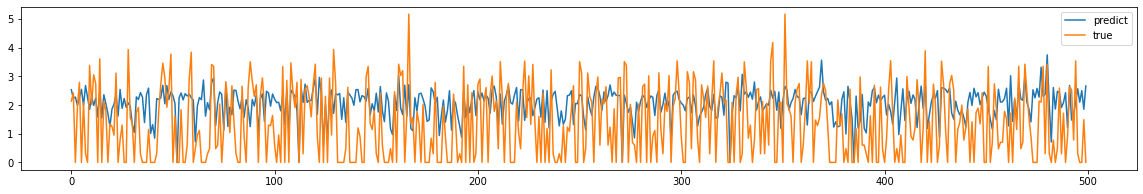

In [173]:
import random
random.seed(42)
idx = random.sample(range(len(pred_vals)), 500)
selected_pred_vals = [pred_vals[i] for i in idx]
selected_true = [y_true_log[i] for i in idx]
plt.figure(figsize=(20, 3))
plt.plot(selected_pred_vals, label='predict')
plt.plot(selected_true, label='true')
plt.legend()